#범주형 자료의 수량화

In [1]:
x=[{'city':'seoul','temp':10.0},{'city':'dubai','temp':33.5},{'city':'LA','temp':20.5}]

In [2]:
from sklearn.feature_extraction import DictVectorizer
vec=DictVectorizer(sparse=False)
#sparse=True 로 하면 희귀행렬이라고 볼 수 없는 형태임
vec.fit_transform(x)

array([[ 0. ,  0. ,  1. , 10. ],
       [ 0. ,  1. ,  0. , 33.5],
       [ 1. ,  0. ,  0. , 20.5]])

In [3]:
#메모리를 줄이기 위해 sparse=True
vec1=DictVectorizer(sparse=True)
x1=vec1.fit_transform(x)
x1

<3x4 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in Compressed Sparse Row format>

In [4]:
#sparse=True 를 풀고 배열로 변경
x1.toarray()
vec1.get_feature_names()

['city=LA', 'city=dubai', 'city=seoul', 'temp']

#텍스트 자료의 수량화

In [38]:
text=['떴다 떴다 비행기 날아라 날아라',
      '높이 높이 날아라 우리 비행기',
      '내가 만든 비행기 날아라 날아라',
      '멀리 멀리 날아라 우리 비행기']

text

['떴다 떴다 비행기 날아라 날아라',
 '높이 높이 날아라 우리 비행기',
 '내가 만든 비행기 날아라 날아라',
 '멀리 멀리 날아라 우리 비행기']

In [39]:
from sklearn.feature_extraction.text import CountVectorizer
vec2=CountVectorizer() #default 는 sparse=True
t=vec2.fit_transform(text).toarray() #sparse=True를 toarray()로 풀고 text를 수량화 배열 자료로 변화
t

array([[2, 0, 0, 2, 0, 0, 1, 0],
       [1, 0, 2, 0, 0, 0, 1, 1],
       [2, 1, 0, 0, 1, 0, 1, 0],
       [1, 0, 0, 0, 0, 2, 1, 1]])

In [40]:
import pandas as pd
t1=pd.DataFrame(t, columns=vec2.get_feature_names())
t1

,날아라,내가,높이,떴다,만든,멀리,비행기,우리
0,2,0,0,2,0,0,1,0
1,1,0,2,0,0,0,1,1
2,2,1,0,0,1,0,1,0
3,1,0,0,0,0,2,1,1


In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer as tfid
#인스턴스를 만드셨다
tfid=TfidfVectorizer()
#높은 빈도는 낮은 가중치, 낮은 빈도는 높은 가중치
t2=tfid.fit_transform(text).toarray()
t2

array([[0.45073542, 0.        , 0.        , 0.86374011, 0.        ,
        0.        , 0.22536771, 0.        ],
       [0.22958935, 0.        , 0.8799199 , 0.        , 0.        ,
        0.        , 0.22958935, 0.34686948],
       [0.56924084, 0.54541547, 0.        , 0.        , 0.54541547,
        0.        , 0.28462042, 0.        ],
       [0.22958935, 0.        , 0.        , 0.        , 0.        ,
        0.8799199 , 0.22958935, 0.34686948]])

In [48]:
t3=pd.DataFrame(t2,columns=tfid.get_feature_names())
t3

,날아라,내가,높이,떴다,만든,멀리,비행기,우리
0,0.450735,0.000000,0.00000,0.86374,0.000000,0.00000,0.225368,0.000000
1,0.229589,0.000000,0.87992,0.00000,0.000000,0.00000,0.229589,0.346869
2,0.569241,0.545415,0.00000,0.00000,0.545415,0.00000,0.284620,0.000000
3,0.229589,0.000000,0.00000,0.00000,0.000000,0.87992,0.229589,0.346869


#결측 데이터 채우기

In [83]:
import numpy as np
# 결측자료
x_miss=np.array([[1,2,3,None],[5,np.NAN,7,8],[None,10,11,12],[13,np.nan,15,16]])
x_miss

array([[1, 2, 3, None],
       [5, nan, 7, 8],
       [None, 10, 11, 12],
       [13, nan, 15, 16]], dtype=object)

In [84]:
from sklearn.impute import SimpleImputer
#열의 평균값으로 대체
im=SimpleImputer(missing_values=np.nan,strategy='mean')
im.fit(x_miss)
print(im.transform(x_miss))

[[ 1.          2.          3.         12.        ]
 [ 5.          6.          7.          8.        ]
 [ 6.33333333 10.         11.         12.        ]
 [13.          6.         15.         16.        ]]


In [85]:
im.fit_transform(x_miss)

array([[ 1.        ,  2.        ,  3.        , 12.        ],
       [ 5.        ,  6.        ,  7.        ,  8.        ],
       [ 6.33333333, 10.        , 11.        , 12.        ],
       [13.        ,  6.        , 15.        , 16.        ]])

#데이터 합치기

##Data downoad

www.kaggle.com/c/rossmann-store-sales/data 에서 자료를 다운받거나 직접 api로 다운

In [58]:
!ls -lha kaggle.json

!pip uninstall -y kaggle
!pip install --upgrade pip
!pip install kaggle==1.5.6

-rw-r--r-- 1 root root 62 Jan 30 11:02 kaggle.json
Found existing installation: kaggle 1.5.6
Uninstalling kaggle-1.5.6:
  Successfully uninstalled kaggle-1.5.6
  Using cached pip-21.0-py3-none-any.whl (1.5 MB)
  Using cached pip-20.3.4-py2.py3-none-any.whl (1.5 MB)
  Using cached kaggle-1.5.6-py3-none-any.whl


In [60]:
! mkdir -p ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

! kaggle -v

Kaggle API 1.5.6


In [61]:
!kaggle competitions download -c rossmann-store-sales

 72% 5.00M/6.99M [00:01<00:00, 3.88MB/s]
100% 6.99M/6.99M [00:01<00:00, 5.40MB/s]


In [62]:
!unzip rossmann-store-sales.zip

Archive:  rossmann-store-sales.zip
  inflating: sample_submission.csv   
  inflating: store.csv               
  inflating: test.csv                
  inflating: train.csv               


##데이터 불러오기

In [63]:
import pandas as pd
df1=pd.read_csv("train.csv", engine='python')
print(df1.shape)

(1017209, 9)


In [64]:
type(df1)

pandas.core.frame.DataFrame

In [65]:
df1.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [67]:
df2=pd.read_csv("store.csv",engine='python')
print(df2.shape)
df2.head()

(1115, 10)


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [87]:
df=pd.merge(df1,df2,on='Store')
print(df.shape)
print(df.dtypes)
#10+9-1=18 로 합쳐짐

(1017209, 18)
Store                          int64
DayOfWeek                      int64
Date                          object
Sales                          int64
Customers                      int64
Open                           int64
Promo                          int64
StateHoliday                  object
SchoolHoliday                  int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
dtype: object


#데이터 불균형

In [2]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE, ADASYN

# n_feature 변경, n_formative 와 n_redundant 추가
X ,y = make_classification(n_classes=3, weights=[0.03, 0.07, 0.9], n_features=2, n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, n_samples=200, random_state=10)

print('Original dataset shape %s' % Counter(y))

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


Original dataset shape Counter({2: 180, 1: 14, 0: 6})


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


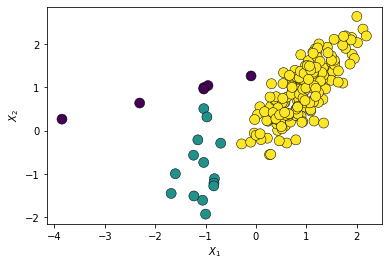

In [3]:
import matplotlib.pyplot as plt
#marker->찍는 모양, c=class, s=원 크기
#edgecolors=모서리 색, linewidth=모서리굵기
plt.scatter(X[:,0], X[:,1], marker='o', c=y, s=100, edgecolors="k",linewidth=0.5)
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.show()

##Over Sampling

###SMOTE

In [4]:
sm= SMOTE(random_state=42)
X_res,y_res=sm.fit_resample(X,y)
print('Resampled dataset shape %s'% Counter(y_res))

Resampled dataset shape Counter({2: 180, 1: 180, 0: 180})


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


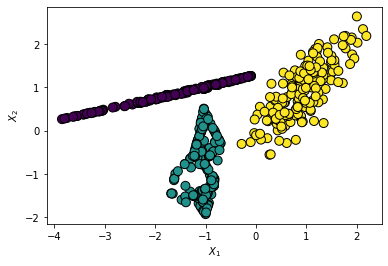

In [5]:
import matplotlib.pyplot as plt

plt.scatter(X_res[:,0],X_res[:,1],marker='o',c=y_res, s=80, edgecolors="k", linewidth=1)

plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.show()

###ADASYN

In [6]:
ada=ADASYN(random_state=0)
X_syn, y_syn=ada.fit_resample(X,y)
print('Resampled dataset shape from ADASYN %s' % Counter(y_syn))

Resampled dataset shape from ADASYN Counter({2: 180, 1: 179, 0: 178})


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


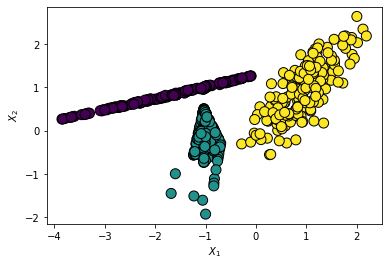

In [10]:
plt.scatter(X_syn[:,0],X_syn[:,1],marker='o',edgecolors="k",linewidths=1,c=y_syn, s=100)

plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.show()

##Under Sampling

In [11]:
from imblearn.under_sampling import NearMiss
undersample=NearMiss(version=3, n_neighbors_ver3=3)
X_Under, y_Under=undersample.fit_resample(X,y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

In [12]:
X_Under

array([[-1.03299817,  0.99712508],
       [-0.95051752,  1.04470696],
       [-2.30786084,  0.64042828],
       [-1.03483946,  0.96440487],
       [-0.09531068,  1.26657692],
       [-3.85126503,  0.26839761],
       [-1.59896271, -0.99343202],
       [-1.23773251, -0.56435167],
       [-0.69786663, -0.2872872 ],
       [-1.15209784, -0.21034017],
       [-0.97186717,  0.31871053],
       [-1.03380506,  0.51081469],
       [-0.10276596, -0.26267046],
       [-0.28285261, -0.30407951],
       [ 0.55001871,  1.34307094],
       [-0.02305955,  0.25952395],
       [ 0.03175702,  0.37383963],
       [ 0.2814798 ,  0.77915311]])

In [13]:
y_Under

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2])

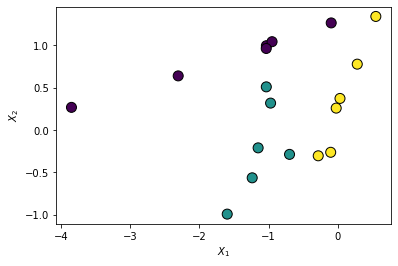

In [16]:
plt.scatter(X_Under[:,0],X_Under[:,1],c=y_Under,marker='o',linewidths=1, edgecolors="k",s=100)
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.show()